<a href="https://colab.research.google.com/github/YaelLopezS/Notebooks-Inteligencia-Artificial-2/blob/main/Notebook4_MultivariateAnalysis_A01664809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multivariate Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 500

In [ ]:
# Datos sinteticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15*MedInc + 0.03*HouseAge + np.random.rand(n)

#target
target = (
    0.45*MedInc
    - 0.02*HouseAge
    - 0.3*(Latitude-36)
    - 0.1*(Longitude+119)
    + np.random.randn(n)*0.5
)

df = pd.DataFrame(
    {
        "MedInc": MedInc,
        "HouseAge": HouseAge,
        "Longitude": Longitude,
        "Latitude": Latitude,
        "AveRooms": AveRooms,
        "target": target,
    }
)

numeric_cols = df.columns.tolist()

In [ ]:
cov_mat = df[numeric_cols].cov()
cov_mat = df[numeric_cols].corr()


print("Covariance Matrix:\n", cov_mat.round(3), "\n")
print("Correlation Matrix:\n", cov_mat.round(3))

Covariance Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.790   0.911
HouseAge   -0.045     1.000     -0.049    -0.002     0.473  -0.168
Longitude   0.008    -0.049      1.000     0.059    -0.015  -0.130
Latitude    0.065    -0.002      0.059     1.000     0.058  -0.244
AveRooms    0.790     0.473     -0.015     0.058     1.000   0.655
target      0.911    -0.168     -0.130    -0.244     0.655   1.000 

Correlation Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.790   0.911
HouseAge   -0.045     1.000     -0.049    -0.002     0.473  -0.168
Longitude   0.008    -0.049      1.000     0.059    -0.015  -0.130
Latitude    0.065    -0.002      0.059     1.000     0.058  -0.244
AveRooms    0.790     0.473     -0.015     0.058     1.000   0.655
target      0.911    -0.168     -0.130    -0.244     0.655   1.000


#Hat-Matrix

In [ ]:
y = df['target'].values.reshape(-1, 1)
x = df[["MedInc", "AveRooms", "HouseAge", "Latitude", "Longitude"]].values

In [ ]:
XtX = x.T @ x
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ x.T @ y
#print(beta)
y_hat = x @ beta

resid = y - y_hat

# Hat Matrix
H = x @ XtX_inv @ x.T
leverage = np.diag(H)
print(leverage)

[0.0067846  0.00791982 0.00847013 0.0172161  0.00440733 0.00525745
 0.01259694 0.00977876 0.01533073 0.01202658 0.00705151 0.01075252
 0.00231869 0.0089819  0.00833198 0.00455737 0.00432348 0.00839827
 0.01196354 0.01361989 0.00732749 0.01285226 0.01140345 0.00569535
 0.01645572 0.0037665  0.01420947 0.00848022 0.00989076 0.0027566
 0.00841421 0.02416634 0.00878854 0.01549929 0.0140942  0.01317021
 0.00470178 0.01161905 0.01379405 0.00339667 0.00505214 0.00815537
 0.00805921 0.00793624 0.00830129 0.00969073 0.00709981 0.01711625
 0.00723452 0.01873673 0.0031081  0.00460647 0.00491858 0.00467417
 0.01330143 0.01080364 0.01133873 0.00894425 0.00300966 0.0110635
 0.00629195 0.0051693  0.00874045 0.00728413 0.00489302 0.0156464
 0.01711969 0.00577284 0.01269716 0.01077955 0.00696396 0.01324823
 0.0039508  0.01208273 0.01835672 0.01415091 0.00409896 0.00691866
 0.00999249 0.00685658 0.00994668 0.01269986 0.02038301 0.00444865
 0.0071463  0.00558483 0.0100084  0.00937241 0.00991305 0.0055030

In [ ]:
print("H", H.shape)
print("y", y.shape)
print("x", x.shape)
print("beta", beta.shape)

H (500, 500)
y (500, 1)
x (500, 5)
beta (5, 1)


In [ ]:
summary = pd.DataFrame (
    {
        "index": np.arange(n),
        "y": y.flatten(),
        "y_hat": y_hat.flatten(),
        "resid": resid.flatten(),
        "leverage": leverage,
    }
)

In [ ]:
print("Top Ten Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top Ten Leverage Points
     index       y   y_hat  resid  leverage
209    209  21.559  22.578 -1.019     0.115
478    478  16.205  16.070  0.135     0.052
179    179  13.891  13.903 -0.012     0.034
234    234   9.052   9.426 -0.374     0.028
220    220  11.794  11.365  0.429     0.028
113    113  12.407  11.945  0.463     0.028
323    323   9.133   9.437 -0.304     0.024
31      31  10.146   9.336  0.811     0.024
284    284  12.293  10.632  1.661     0.024
252    252  11.302  11.293  0.010     0.024


In [ ]:
n, p = x.shape
print("n", n)
print("p", p)

avg_lev = p/n
threshold = 2*avg_lev
print("avg_lev", avg_lev)
print("threshold", threshold)

n 500
p 5
avg_lev 0.01
threshold 0.02


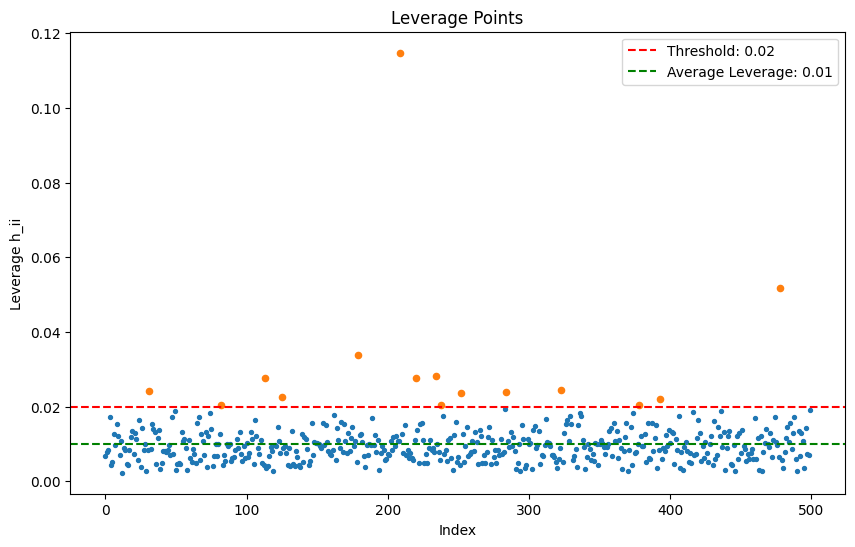

In [ ]:
# Plotting leverage points
plt.figure(figsize=(10,6))
plt.scatter(summary["index"], summary["leverage"], s=8)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(y=avg_lev, color='g', linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')
hi_idx = summary.index[summary["leverage"] > threshold].tolist()
if len(hi_idx) > 0:
  plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=20)
plt.title("Leverage Points")
plt.xlabel("Index")
plt.ylabel("Leverage h_ii")
plt.legend()
plt.show()

In [ ]:
# Leveragepoints
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Generate synthetic data
np.random.seed(0)

#Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size + np.random.normal(0, 20000, 100)


# Add few mansion
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])


#Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [ ]:
#Printing model parameter
print("Model with mansions:")
print(f"Intercep: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")

Model with mansions:
Intercep: -225040.03
Slope: 114.59


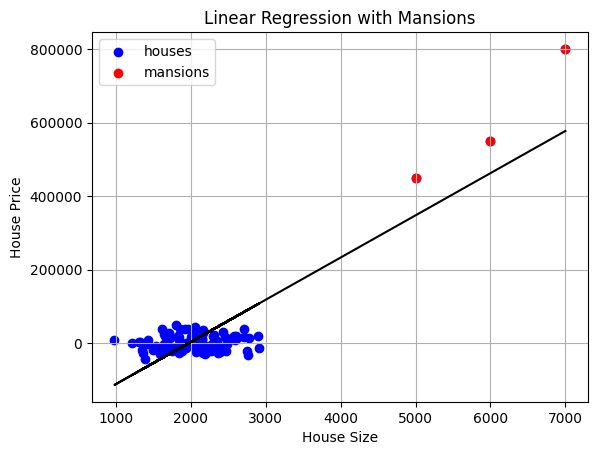

In [ ]:
#Plot the data
plt.scatter(house_size, house_price, label="houses", color="blue")
plt.scatter(house_size[-3:], house_price[-3:], label="mansions", color="red")
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color="black")
plt.title("Linear Regression with Mansions")
plt.xlabel("House Size")
plt.ylabel("House Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

#Threshold
n = len(house_size)
p = X.shape[1]
avg_lev = p/n
threshold = 2*avg_lev
print("threshold", threshold)

threshold 0.038834951456310676


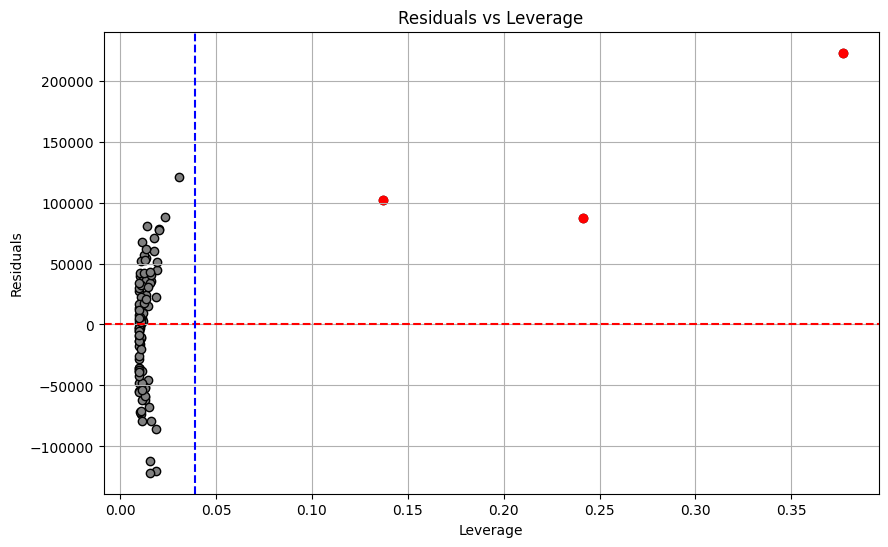

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(leverage, residuals, edgecolors="k", facecolor="gray")
plt.axhline(0, color='r', linestyle='--')
plt.axvline(threshold, color="blue", linestyle="--")
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.grid(True)

high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color="red", label="High Leverage Points")


plt.show()

In [ ]:
print(f"High leverage points (index): {high_leverage_points}")
print(f"Leverage values: {leverage[high_leverage_points]}")

High leverage points (index): [100 101 102]
Leverage values: [0.13694378 0.24146323 0.37708716]


Exercise 1:

Use the Boston Housing dataset, analyze it, and identify its leverage points. This dataset is available in the kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/HousingData.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
# Rellenamos cualquier valor nulo con el promedio de su columna
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Definimos las variables y ajusta el modelo
y = df['MEDV']
X = df['LSTAT']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [ ]:
# Calculamos el apalancamiento, los residuos y el umbral de detección
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid
n = len(df)
p = X.shape[1]
threshold = 2 * p / n

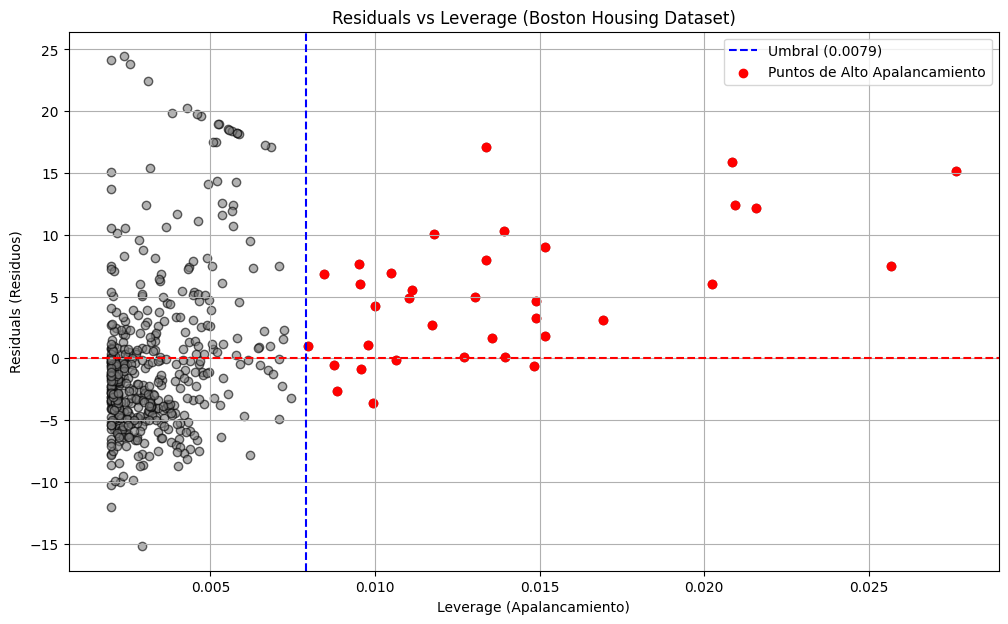

In [ ]:
# Generamos la grafica de residuos vs apalancamiento
plt.figure(figsize=(12, 7))
plt.scatter(leverage, residuals, edgecolors="k", facecolor="gray", alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.axvline(threshold, color="blue", linestyle="--", label=f'Umbral ({threshold:.4f})')
high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points],
            color="red", label="Puntos de Alto Apalancamiento")
plt.title("Residuals vs Leverage (Boston Housing Dataset)")
plt.xlabel("Leverage (Apalancamiento)")
plt.ylabel("Residuals (Residuos)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Mostramos los puntos con mayor apalancamiento encontrados
high_leverage_df = df.iloc[high_leverage_points].copy()
high_leverage_df['leverage'] = leverage[high_leverage_points]
print(high_leverage_df.sort_values('leverage', ascending=False).head())

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
374  18.49820  0.0  18.10   0.0  0.668  4.138  100.0  1.1370   24  666   
414  45.74610  0.0  18.10   0.0  0.693  4.519  100.0  1.6582   24  666   
373  11.10810  0.0  18.10   0.0  0.668  4.906  100.0  1.1742   24  666   
141   1.62864  0.0  21.89   0.0  0.624  5.019  100.0  1.4394    4  437   
412  18.81100  0.0  18.10   0.0  0.597  4.628  100.0  1.5539   24  666   

     PTRATIO       B  LSTAT  MEDV  leverage  
374     20.2  396.90  37.97  13.8  0.027657  
414     20.2   88.27  36.98   7.0  0.025683  
373     20.2  396.90  34.77  13.8  0.021562  
141     21.2  396.90  34.41  14.4  0.020927  
412     20.2   28.79  34.37  17.9  0.020858  


Exercise 2:

Use the diamonds dataset, analyze it, and identify its leverage points. This dataset is available in the seaborn library.

In [ ]:
# Cargamos el dataset
diamonds = sns.load_dataset('diamonds')

In [ ]:
# Preparamos los datos para el modelo
y = diamonds['price'] #Lo que queremos predecir
X = diamonds['carat'] #Lo que usaremos para predecir
X = sm.add_constant(X)

In [ ]:
# Ajustamos el modelo de regresión lineal (OLS)
model = sm.OLS(y, X).fit()

print(f"Intercepto (const): {model.params.iloc[0]:.2f}")
print(f"Pendiente (carat): {model.params.iloc[1]:.2f}")

Intercepto (const): -2256.36
Pendiente (carat): 7756.43


In [ ]:
# Obtenemos el apalancamiento y los residuos
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

In [ ]:
# Calculamos el umbral para el apalancamiento

n = len(diamonds)
p = X.shape[1]
threshold = 2 * p / n

print(f"Umbral de apalancamiento: {threshold:.6f}")

Umbral de apalancamiento: 0.000074


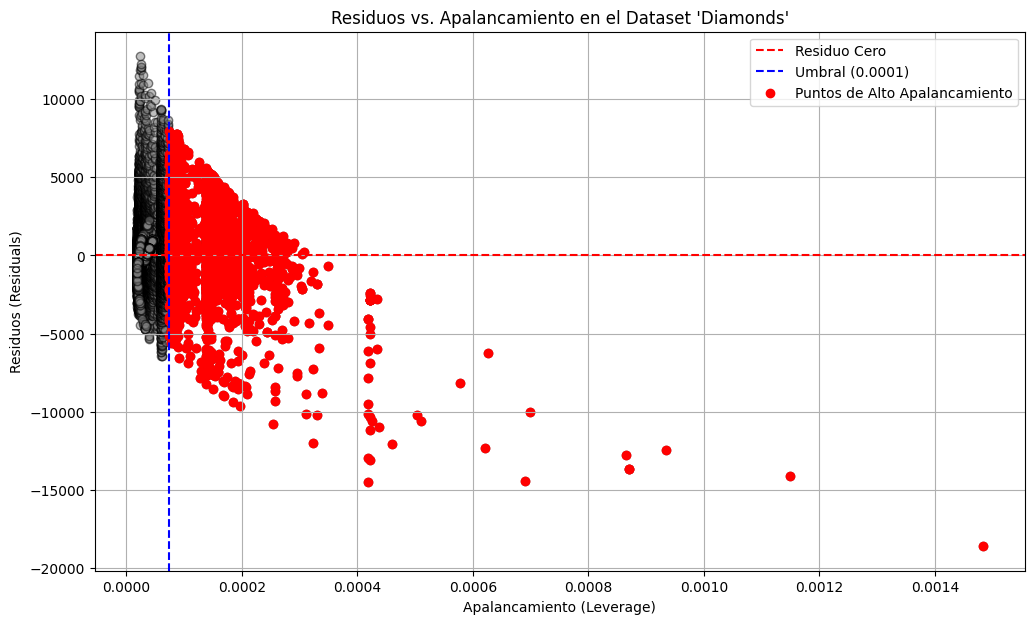

In [ ]:
# Graficamos residuos vs. apalancamiento
plt.figure(figsize=(12, 7))


plt.scatter(leverage, residuals, edgecolors="k", facecolor="gray", alpha=0.5)
plt.axhline(0, color='r', linestyle='--', label='Residuo Cero')
plt.axvline(threshold, color="blue", linestyle="--", label=f'Umbral ({threshold:.4f})')



high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points],
            color="red", label="Puntos de Alto Apalancamiento")

plt.title("Residuos vs. Apalancamiento en el Dataset 'Diamonds'")
plt.xlabel("Apalancamiento (Leverage)")
plt.ylabel("Residuos (Residuals)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Mostramos informacion sobre los puntos identificados

# Creamos un DataFrame con los datos de los puntos de alto apalancamiento
high_leverage_df = diamonds.iloc[high_leverage_points].copy()
high_leverage_df['leverage'] = leverage[high_leverage_points]

# Ordenamos por apalancamiento y mostramos los 5 más altos
print(high_leverage_df.sort_values('leverage', ascending=False).head())

       carat      cut color clarity  depth  table  price      x      y     z  \
27415   5.01     Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98   
27630   4.50     Fair     J      I1   65.8   58.0  18531  10.23  10.16  6.72   
27130   4.13     Fair     H      I1   64.8   61.0  17329  10.00   9.85  6.43   
25999   4.01  Premium     J      I1   62.5   62.0  15223  10.02   9.94  6.24   
25998   4.01  Premium     I      I1   61.0   61.0  15223  10.14  10.10  6.17   

       leverage  
27415  0.001482  
27630  0.001149  
27130  0.000935  
25999  0.000870  
25998  0.000870  
